In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Analysis for `customers_df`

In [2]:
customers_df = pd.read_csv(r"../data/olist_customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
customers_df.duplicated().sum()

np.int64(0)

In [4]:
dup_ids = customers_df["customer_unique_id"].value_counts()
dup_ids[dup_ids > 1]

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
2dcbfb99d95c7ba6eb992a98627f45b8     2
da29b8a3970adddb9ed2dc8a492065af     2
4c93744516667ad3b8f1fb645a3116a4     2
1175e95fb47ddff9de6b2b06188f7e0d     2
295c05e81917928d76245e842748184d     2
Name: count, Length: 2997, dtype: int64

In [5]:
customers_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 26.6 MB


In [6]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474181
std,29797.939288
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [7]:
print(customers_df["customer_id"].nunique())
print(customers_df["customer_unique_id"].nunique())

99441
96096


The number of unique customer IDs is **lesser** than the total entries in `customers_id`; this implies some of the customers are repeated/not unique. Hence, `customer_id` is our primary key, **not** customer_unique_id.

In [8]:
print(customers_df["customer_zip_code_prefix"].nunique())
print(customers_df["customer_city"].nunique())
print(customers_df["customer_state"].nunique())

14995
4119
27


## Analysis for `orders_df`

In [9]:
orders_df = pd.read_csv(r"../data/olist_order_items_dataset.csv", parse_dates=["shipping_limit_date"])
orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
orders_df.duplicated().sum()

np.int64(0)

In [11]:
dup_ids = orders_df["order_id"].value_counts()
dup_ids[dup_ids > 1]

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
7828e49a0881db0def748546e4b2c8dc     2
ffd84ab39cd5e873d8dba24342e65c01     2
ffe4b41e99d39f0b837a239110260530     2
0008288aa423d2a3f00fcb17cd7d8719     2
df473c5f4e43c7d63af78684cc44c521     2
Name: count, Length: 9803, dtype: int64

In [12]:
orders_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 29.5 MB


In [13]:
orders_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112650.000000,112650,112650.000000,112650.000000
mean,1.197834,2018-01-07 15:36:52.192685312,120.653739,20.031952
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:35,74.990000,16.270000
75%,1.000000,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705124,NaN,183.633928,16.017651


In [14]:
orders_df["order_id"].nunique()

98666

In [15]:
print(orders_df["order_item_id"].nunique())
print(orders_df["product_id"].nunique())
print(orders_df["seller_id"].nunique())

21
32951
3095


## Analysis for `orderinfo_df`

In [16]:
orderinfo_df = pd.read_csv(r"../data/olist_orders_dataset.csv", parse_dates=["order_purchase_timestamp", "order_approved_at",
"order_delivered_carrier_date", "order_delivered_customer_date",  "order_estimated_delivery_date"])
orderinfo_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [17]:
orderinfo_df.duplicated().sum()

np.int64(0)

Thus, we can see and verify that `orders_df`, `orderinfo_df` have the common key *order_id*, and `customers_df`, `orderinfo_df` have the common key *customer_df*

In [18]:
# ['delivered', 'invoiced', 'shipped', 'processing', 'unavailable', 'canceled', 'created', 'approved']
orderinfo_df["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

## Looking at some sample records

### Example 1

In [19]:
orderinfo_df.query("customer_id == 'f37a14140ac3a8efbb4d2eab6585edb7'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
53988,ed92e8596b1e39671065510a4f5b0920,f37a14140ac3a8efbb4d2eab6585edb7,delivered,2018-02-20 10:45:22,2018-02-20 11:50:38,2018-03-07 19:58:53,2018-03-15 21:21:45,2018-03-14


In [20]:
orders_df.query("order_id == 'ed92e8596b1e39671065510a4f5b0920'")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
104584,ed92e8596b1e39671065510a4f5b0920,1,7fd6586464df3ea9bad637e34580c186,52f0fe436a347ddad7ed5f9aa4e27eaa,2018-02-26 11:50:38,59.99,16.18


### Example 2

In [21]:
orderinfo_df.query("order_id == '00010242fe8c5a6d1ba2dd792cb16214'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
85267,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29


In [22]:
orders_df.query("order_id == '00010242fe8c5a6d1ba2dd792cb16214'")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [23]:
customers_df.query("customer_id == '3ce436f183e68e07877b285a838db11a'")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
65557,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ


### Example 3

In [24]:
orderinfo_df.query("order_id == '000229ec398224ef6ca0657da4fc703e'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6298,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05


In [25]:
orders_df.query("order_id == '000229ec398224ef6ca0657da4fc703e'")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [26]:
customers_df.query("customer_id == '6489ae5e4333f3693df5ad4372dab6d3'")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
34955,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG


## Continuing analysis

In [27]:
orderinfo_df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 24.7 MB


In [28]:
orderinfo_df.query("order_status == 'created'") #To keep? We drop since all 5 order_ids are invalid / not present in orders_df's order_id

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01


In [29]:
print(orderinfo_df["customer_id"].nunique())
print(orderinfo_df["order_id"].nunique())
print(orders_df["order_id"].nunique())

99441
99441
98666


## Merging

In [30]:
print("Percentage of data missing:", orderinfo_df.isna().sum().sum() * 100 / (orderinfo_df.shape[0] * orderinfo_df.shape[1]), "%")
orderinfo_df.isna().sum()
# order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
# are the columns with missing values (all datetime)

Percentage of data missing: 0.616948743476031 %


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [31]:
orders_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [32]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [33]:
merged_1 = orderinfo_df.merge(customers_df, left_on="customer_id", right_on = "customer_id", how = "left")

In [34]:
merged_1.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [35]:
merged_1.shape

(99441, 12)

In [36]:
merged_final = merged_1.merge(orders_df, left_on="order_id", right_on="order_id", how = "right") 
# Right merge, because orders_df contains the valid order_ids and NOT orderinfo_df

In [37]:
merged_final.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   customer_unique_id             112650 non-null  object        
 9   customer_zip_code_prefix       112650 non-null  int64         
 10  customer_city                  112650 non-null  object        
 11  

In [38]:
merged_final.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [39]:
print(merged_final["order_status"].nunique())
print(merged_final["customer_city"].nunique())
print(merged_final["customer_state"].nunique())
print(merged_final["order_item_id"].nunique())

7
4110
27
21


In [40]:
4110 < 0.05 * len(merged_final)

True

In [41]:
merged_final["order_status"] = merged_final["order_status"].astype("category")
merged_final["customer_city"] = merged_final["customer_city"].astype("category")
merged_final["customer_state"] = merged_final["customer_state"].astype("category")
merged_final["order_item_id"] = merged_final["order_item_id"].astype("category")

In [42]:
merged_final.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  category      
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   customer_unique_id             112650 non-null  object        
 9   customer_zip_code_prefix       112650 non-null  int64         
 10  customer_city                  112650 non-null  category      
 11  

In [43]:
(merged_final.isna().sum().sum() / (merged_final.shape[0] * merged_final.shape[1]))* 100

np.float64(0.18064802485574788)

In [44]:
merged_final.to_parquet(r"../data/merged_info.parquet", index = False, engine='pyarrow', compression='snappy')

We convert to parquet, instead of csv, because
* csv does preserve data types of the columns
* columnar storage is efficient, because some columns have only a few unique values
* takes much lesser time to read in the data for further analysis in the following processing steps
* takes up only ~50% of the storage capacity as csv

In [45]:
# dummy example
import time
start = time.time()
merged_final.to_csv(r"../data/merged_info.csv", index = False)
print(time.time() - start)
start = time.time()
df_dummy = pd.read_csv(r"../data/merged_info.csv")
print(time.time() - start)

3.6018004417419434
0.8047525882720947


In [46]:
# dummy example
start = time.time()
merged_final.to_parquet(r"../data/merged_info.parquet", index = False, engine='pyarrow', compression='snappy')
print(time.time() - start)
start = time.time()
df_dummy = pd.read_parquet(r"../data/merged_info.parquet")
print(time.time() - start)

0.3972280025482178
0.2690737247467041


## Efficiently reading in data for further analysis

In [47]:
df = pd.read_parquet(r"../data/merged_info.parquet")

Thus handled datetime conversions for order timestamps!

In [48]:
df.info(memory_usage="deep") # preserves data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  category      
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   customer_unique_id             112650 non-null  object        
 9   customer_zip_code_prefix       112650 non-null  int64         
 10  customer_city                  112650 non-null  category      
 11  

In [49]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [50]:
df["order_status"].unique()
# We see that the category "created" is now completely missing (had invalid order_ids)

['delivered', 'shipped', 'canceled', 'invoiced', 'processing', 'approved', 'unavailable']
Categories (7, object): ['approved', 'canceled', 'delivered', 'invoiced', 'processing', 'shipped', 'unavailable']

## Some more analysis

In [51]:
set1 = set(orderinfo_df["order_id"])
set2 = set(orders_df["order_id"])
intersection = set1 & set2
print(len(set1), len(set2), len(intersection))
invalid_df = orderinfo_df.loc[lambda x: ~(x["order_id"].isin(intersection))]
valid_df = orderinfo_df.loc[lambda x: ~(x.index.isin(invalid_df.index))]
invalid_df.query("order_status == 'created'")

99441 98666 98666


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
7434,b5359909123fa03c50bdb0cfed07f098,438449d4af8980d107bf04571413a8e7,created,2017-12-05 01:07:52,NaT,NaT,NaT,2018-01-11
9238,dba5062fbda3af4fb6c33b1e040ca38f,964a6df3d9bdf60fe3e7b8bb69ed893a,created,2018-02-09 17:21:04,NaT,NaT,NaT,2018-03-07
21441,7a4df5d8cff4090e541401a20a22bb80,725e9c75605414b21fd8c8d5a1c2f1d6,created,2017-11-25 11:10:33,NaT,NaT,NaT,2017-12-12
55086,35de4050331c6c644cddc86f4f2d0d64,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaT,NaT,NaT,2018-01-08
58958,90ab3e7d52544ec7bc3363c82689965f,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaT,NaT,NaT,2017-12-01


In [52]:
valid_df.query("order_status == 'created'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


* From above, we see that the status "created" only occurs in the case when the order_id is invalid;
* this means we can drop these invalid order_ids before merging, and lose information about the existence of the status "created";
* this dropping is done implicitly by the right merge above.

## Looking for nonsensical records

order_status categories: `['delivered', 'shipped', 'canceled', 'invoiced', 'processing', 'approved', 'unavailable']`

In [53]:
df.select_dtypes(include=['datetime64[ns]'])

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
0,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09-19 09:45:35
1,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017-05-03 11:05:13
2,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2018-01-18 14:48:30
3,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,2018-08-15 10:10:18
4,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,2017-02-13 13:57:51
...,...,...,...,...,...,...
112645,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,2018-05-02 04:11:01
112646,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,2018-07-20 04:31:48
112647,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,2017-10-30 17:14:25
112648,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,2017-08-21 00:04:32


In [54]:
df.query("order_purchase_timestamp > order_approved_at").index

Index([], dtype='int64')

In [55]:
df.query("order_approved_at > order_delivered_carrier_date").index

Index([     7,     56,     67,    118,    283,    344,    526,    529,    575,
          655,
       ...
       112116, 112236, 112313, 112356, 112461, 112471, 112545, 112564, 112624,
       112633],
      dtype='int64', length=1551)

In [56]:
df.query("order_delivered_carrier_date > order_delivered_customer_date").index

Index([  4073,   4074,  11419,  12690,  12691,  18127,  18128,  24687,  24688,
        27653,  27654,  41982,  41983,  51979,  52314,  52315,  61593,  61594,
        67223,  67224,  70866,  70867,  70868,  78449,  78450,  81115,  81116,
        85339,  85340,  89394,  89395,  94093,  94094,  97387,  97388,  97389,
       100333, 100334, 100335, 100336, 100337, 100338, 100339, 103091, 103092,
       108461, 110129, 110130, 110915, 110916],
      dtype='int64')

In [57]:
df.drop(df.query("order_approved_at > order_delivered_carrier_date").index, axis = 0, inplace = True)

In [58]:
df.drop(df.query("order_delivered_carrier_date > order_delivered_customer_date").index, axis = 0, inplace = True)

In [59]:
df.reset_index(drop = True, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111049 entries, 0 to 111048
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111049 non-null  object        
 1   customer_id                    111049 non-null  object        
 2   order_status                   111049 non-null  category      
 3   order_purchase_timestamp       111049 non-null  datetime64[ns]
 4   order_approved_at              111034 non-null  datetime64[ns]
 5   order_delivered_carrier_date   109855 non-null  datetime64[ns]
 6   order_delivered_customer_date  108604 non-null  datetime64[ns]
 7   order_estimated_delivery_date  111049 non-null  datetime64[ns]
 8   customer_unique_id             111049 non-null  object        
 9   customer_zip_code_prefix       111049 non-null  int64         
 10  customer_city                  111049 non-null  category      
 11  

In [60]:
df.to_parquet(r"../data/merged_info_after_drop.parquet", index = False, engine='pyarrow', compression='snappy')

### Understanding the flow: 
* created
* approved
* processing
* invoiced
* unavailable (if not declared before approval, like in this dataset, to be declared after approval and before shipping)
* shipped
* delivered
* canceled, at any stage after approval (ideally, should be before approval, but not so in this dataset)

In [61]:
df = pd.read_parquet(r"../data/merged_info_after_drop.parquet")

### Created

In [62]:
df.loc[df["order_status"] == "created"] # already dropped

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


### Approved

In [63]:
df.loc[df["order_status"] == "approved"] # imputation unnecessary; "order_delivered_carrier_date", "order_delivered_customer_date" should be missing

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
8287,132f1e724165a07f6362532bfb97486e,b2191912d8ad6eac2e4dc3b6e1459515,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaT,NaT,2017-05-22,6a068ccd3a149b5c8ceb4e04c83feb8a,8255,sao paulo,SP,1,c4a1c4638fa9e2e4861d141d6e0259e7,5444b12c82f21c923f2639ebc722c1ea,2017-05-08 20:32:41,169.90,9.56
70438,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01,7b9d52d22310baecad0f9df64872208d,35590,lagoa da prata,MG,1,dcecb611ba878d5d8c7853585b285c12,8cc6a0e5738e61a87b03c78b2ba9db4b,2017-02-10 20:18:17,19.85,10.96
70439,a2e4c44360b4a57bdff22f3a4630c173,8886130db0ea6e9e70ba0b03d7c0d286,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaT,NaT,2017-03-01,7b9d52d22310baecad0f9df64872208d,35590,lagoa da prata,MG,2,dcecb611ba878d5d8c7853585b285c12,8cc6a0e5738e61a87b03c78b2ba9db4b,2017-02-10 20:18:17,19.85,10.96


### Unavailable

In [64]:
df.loc[df["order_status"] == "unavailable"]
# imputation unnecessary; "order_delivered_carrier_date", "order_delivered_customer_date" should be missing;
# but, note that they were all approved!

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
11389,1a47da1d66c70489c8e35fe2b5433ab7,3d8e326c3cef3a9bba7ca121baac5fc3,unavailable,2016-10-07 18:16:31,2016-10-07 18:53:48,NaT,NaT,2016-12-07,b18b6d40c3c5510727e0f22b568d3e1f,91430,porto alegre,RS,1,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 18:53:48,249.90,20.85
20610,2fd1c83dd4714cf3cf796fffb6c8de62,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29,30fceee7cb0dbe6926f2b1128f2b3648,31910,belo horizonte,MG,1,17c7ec33a1657924ad493e6978b4bf91,3d01d1c414c44b5943a09619ff3853cb,2016-10-10 15:55:42,99.00,9.12
20611,2fd1c83dd4714cf3cf796fffb6c8de62,7f51c513004ef3f35e834c142f286778,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaT,NaT,2016-11-29,30fceee7cb0dbe6926f2b1128f2b3648,31910,belo horizonte,MG,2,966a067b38634929844120e39b1576bc,61f159ef6da2d441951d2c0efa719362,2016-10-10 15:55:41,59.99,24.08
26096,3c3ca08854ca922fe8e9cedfd6841c8a,88c36fbd3df96094f90f0315e1d2dd90,unavailable,2016-10-08 12:13:38,2016-10-08 13:21:35,NaT,NaT,2016-11-30,e629cd3ff381ad0a234016fa7dd76f46,8610,suzano,SP,1,ac6c24af9f913c9375a3ea77883bda6e,5206cc4bc2297c833e6061c49bf9c43f,2016-10-12 13:21:35,35.00,10.96
33941,4dd47e84e6b8ff4a63d0b8425e6d788e,96bbcbc8372c86da857d842dfda6bd72,unavailable,2016-10-06 23:49:18,2016-10-07 01:09:08,NaT,NaT,2016-11-24,e347a8d0bfec0255258cc913ed28d3a9,28010,campos dos goytacazes,RJ,1,2aa489c905e1d41d8c716a6d6912d8c2,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 01:09:09,299.90,13.68
36824,54bb06e1ca86bd99ee2a8d6288bf4ede,98bfbf477ed9f40a0264f5e527a446be,unavailable,2016-10-06 13:38:39,2016-10-06 14:22:19,NaT,NaT,2016-12-12,8aa802da0f525a68e7fae5e67929ebdd,18147,aracariguama,SP,1,bef13288a0f8b26d763411ced1dfa268,cf281cf8b7affbdfe751b29cc85580e1,2016-10-29 09:43:46,64.90,25.33
95653,dc18a044b56ed174037ca164cdf2e921,4a06381959b6670756de02e07b83815f,unavailable,2016-10-05 14:16:28,2016-10-06 15:56:49,NaT,NaT,2016-11-29,b92a2e5e8a6eabcc80882c7d68b2c70b,6730,vargem grande paulista,SP,1,faa268ecc8a8434cb4ebee091b3222d6,f0563bacf40c311f1c4d3d6b67b8a7a7,2016-10-21 16:18:52,1199.00,28.78


### Canceled

In [65]:
df.query("order_status == 'canceled'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
81,00310b0c75bb13015ec4d82d341865a4,0dad07848c618cc5a4679a1bfe1db8d2,canceled,2018-08-15 14:29:08,2018-08-15 15:04:25,NaT,NaT,2018-08-29,ec979208947bbba310f2ad8e50963725,31160,belo horizonte,MG,1,c8e7c2ef329fcda4a233e7e2f8bb8b7d,a2deecd5398f5df4987110c80a1972a3,2018-08-17 15:04:25,39.90,15.38
266,00ae7a8b4936674ebb701d4a23719a79,a7e8a3cb55d9c9a536992c6465a46a3f,canceled,2018-05-09 14:14:06,2018-05-09 15:51:32,NaT,NaT,2018-05-17,f0b9f688a3b9151bc6b38f4b5b36ea44,6539,santana de parnaiba,SP,1,66f09a6de4f2ef63aaf5349b60a0e0c0,bf0d50a6410d487dc97d2baac0a8c0be,2018-05-15 15:51:32,27.90,9.26
416,00ff0cf5583758e6964723e42f111bf4,e3626ed5d1f2e3a02d692ec948b25eeb,canceled,2017-04-10 00:45:56,2017-04-10 01:03:29,NaT,NaT,2017-05-04,b9badb100ff8ecc16a403111209e3a06,88025,florianopolis,SC,1,bb1fe952bdc16ef8974d4ca11aec19b7,b17b679f4f5ce2e03ce6968c62648246,2017-04-14 01:03:29,154.90,15.25
535,013e9c654a339d80b53513da3c1ea437,9391729f79cd9e5fd7ca884ca030f579,canceled,2017-06-18 13:48:48,2017-06-18 13:55:18,NaT,NaT,2017-07-07,05a3b50193563913613acada5c86b1d2,18710,arandu,SP,1,bcac2cdcd851929a5caa3e1508d5abc9,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-06-22 13:55:18,109.90,13.11
550,0148d3df00cebda592d4e5f966e300cc,672510553bcfbf72de694db2cd88f046,canceled,2017-08-19 19:08:26,2017-08-19 19:24:32,NaT,NaT,2017-09-11,e75fd09539dff5c7c80a12781404ffea,4078,sao paulo,SP,1,ed08ea04c92f5f434c2362f7310fb328,0adac9fbd9a2b63cccaac4f8756c1ca8,2017-08-24 19:24:32,5.53,11.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108976,fb265b2dc558a56445dfc48f8224e201,910f716e941709375465b7d3ff059d4f,canceled,2017-10-10 20:21:14,2017-10-10 20:35:15,NaT,NaT,2017-11-08,f50ca6544a0ed8a52cc964e15cbe9cf9,99700,erechim,RS,1,baf25ed4f8f70238cc87230379471454,128f9bfbe4c7d5185033914b1de3d39a,2017-10-18 21:35:15,9.90,121.22
109444,fc3c882665c98c9b737a7b1b3aa6c553,01866d949d55c81c28d255114948b72b,canceled,2018-04-17 18:41:50,2018-04-17 18:55:18,NaT,NaT,2018-05-04,7ce5c1a457d7d23a2fca222d8f3d37e3,4911,sao paulo,SP,1,44aadbb26d5c81d9846b0c48bc00d7a3,2528513dd95219a6013d4d05176e391a,2018-04-23 18:55:18,28.90,8.88
110119,fdbbb1715d0c62c714e2a8178b95dd54,4eee43e4ae51748483930117ac32369d,canceled,2018-05-20 21:30:58,2018-05-20 21:50:38,NaT,NaT,2018-05-29,eea78edb87f2b1d88a973f29c5f49426,8220,sao paulo,SP,1,1b43b0a6105ffaa6dae01356daec2657,cc419e0650a3c5ba77189a1882b7556a,2018-05-22 21:50:38,57.99,11.15
110484,fe9aa3b22b4d65ccbaffb57984bc12fb,e14603210bf5355859bea3b45bbad044,canceled,2017-11-14 19:30:10,2017-11-14 19:50:28,NaT,NaT,2017-11-28,0f1443bd810ee6fcfa261d95ff34446f,13305,itu,SP,1,e71589252b1fc69c5a7931ee5028ecf6,0432ead42b6c8a0bdf68154add917fdf,2017-11-21 19:50:28,39.90,7.78


In [66]:
df.loc[df["order_status"] == "canceled"].isna().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     466
order_delivered_customer_date    535
order_estimated_delivery_date      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
dtype: int64

In [67]:
# This means of the 542 canceled records, 535 - 466 = 69 orders were shipped but not delivered;
# and 542 - 535 = 7 orders were delivered, despite being canceled!

In [68]:
df.loc[df["order_status"] == "canceled"].loc[lambda x: ~x["order_delivered_customer_date"].isna()]
# change order_delivered_customer_date to NaT?
# No, because technically, there is nothing wrong with the data, since
# we can see that most of these deliveries were completed because of the large gap (~1 month)
# between "order_estimated_delivery_date" & "order_delivered_customer_date", 
# potentially meaning they were cancelled in this one-month timeframe, when shipping was already complete

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
10970,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09,6a04c8339c44b23e189446216a494569,32071,contagem,MG,1,e435ceb7ced9b8446defd858630454ed,2a61c271b1ac763450d846849783e922,2018-02-23 20:56:05,29.99,14.10
19001,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08,d93a22bb52bb2f41a7267b8a02370781,88058,florianopolis,SC,1,e24f73b7631ee3fbb2ab700a9acaa258,0cbcee27c791afa0cdcb08587a2013a8,2016-10-14 10:40:50,135.00,18.51
44167,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,b8b8726af116a5cfb35b0315ecef9172,22770,rio de janeiro,RJ,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11
51568,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29,59a7bb642795ddc85534fbd5f7360334,20091,rio de janeiro,RJ,1,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 15:07:11,249.90,14.03
60526,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30,f9af3bfab584769f34c314b222d34263,20091,rio de janeiro,RJ,1,c66def7098f4d87751f40c3a4855ced1,46dc3b2cc0980fb8ec44634e21d2718e,2016-10-13 14:34:31,99.99,11.23
95043,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,1,473795a355d29305c3ea6b156833adf5,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,59.90,0.48
95044,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,2f96790fba243100730c8d1185dd2f25,5846,sao paulo,SP,2,7cd29da0653abeb444703cc5a957f479,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,49.90,29.94


### Processing

In [69]:
df.loc[df["order_status"] == "processing"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
1827,042ce41927758767ec2aa0de06486b4c,ffa8a2de48bb3fb30f0452c34d3b978d,processing,2017-12-01 10:39:13,2017-12-03 10:53:16,NaT,NaT,2017-12-29,1479d41bbd302e37d1316c996c1f55ae,38407,uberlandia,MG,1,816c0585d491ed8127cebbb3dc7c89cf,dd533b429f380718b70ad9922c294bae,2017-12-08 10:53:16,569.90,22.87
2351,055f84fd2ebf314ebec85f8e1312f4f4,82ff01ff3cdbae8ef85c10481d360d1a,processing,2018-01-13 17:32:09,2018-01-15 10:10:50,NaT,NaT,2018-02-14,372176bac23e7328e3e7dc6f9be66abd,37460,passa quatro,MG,1,a28d469a29d93b4ec13ce26150184e34,5ca5d579b5857ee8709479b1047cecc3,2018-01-19 10:10:50,169.90,15.94
2439,058c781acedf69d42ac38a568ca97b05,5f20182d4742c105de1967ae7154043c,processing,2018-05-05 21:03:55,2018-05-05 21:33:03,NaT,NaT,2018-05-28,545223946e151aeefdcd88b6560c6419,27520,resende,RJ,1,cffb05bb50a95e92fc26bbb049cc8fe7,cca3071e3e9bb7d12640c9fbe2301306,2018-05-09 21:31:14,104.90,23.31
2488,05a971ae7a83a0b371ae1b5bfc45514e,c8b5cf65af25e599ec44662ffe565065,processing,2017-01-31 00:11:36,2017-02-01 04:32:09,NaT,NaT,2017-03-17,27471f7fc206da344fa29b57c48417c0,18060,sorocaba,SP,1,e951fa511351528e83ebde739f059348,8a87611c08849ffeeccab52aa798b6c7,2017-02-04 00:11:36,255.90,18.00
2512,05b7b6d543fe8045020d831080945bfd,bb463a696f34481aedd8de6488bdc959,processing,2017-12-03 17:30:49,2017-12-03 17:38:26,NaT,NaT,2017-12-27,dcbccb9a6e118d352f497b94cfa57f52,30662,belo horizonte,MG,1,ceda8168fb181a91487d6e924f42334f,b335c59ab742f751a85db9c411a86739,2017-12-07 17:38:26,125.62,17.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110551,fecc4ea5a3e06ce3192ae2f05b7a8439,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52:31,2018-01-14 22:09:08,NaT,NaT,2018-02-06,12bf6178776d90da204cdf1b37d23906,13214,jundiai,SP,1,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,39.90,14.10
110552,fecc4ea5a3e06ce3192ae2f05b7a8439,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52:31,2018-01-14 22:09:08,NaT,NaT,2018-02-06,12bf6178776d90da204cdf1b37d23906,13214,jundiai,SP,2,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,39.90,14.10
110553,fecc4ea5a3e06ce3192ae2f05b7a8439,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52:31,2018-01-14 22:09:08,NaT,NaT,2018-02-06,12bf6178776d90da204cdf1b37d23906,13214,jundiai,SP,3,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,39.90,14.10
110554,fecc4ea5a3e06ce3192ae2f05b7a8439,ec43686dd7b2f48ea65475606fdfc85d,processing,2018-01-14 21:52:31,2018-01-14 22:09:08,NaT,NaT,2018-02-06,12bf6178776d90da204cdf1b37d23906,13214,jundiai,SP,4,70adb75b3b2e86cffbb697c90867c3f3,4e2627090e6e5b9fabba883a37897683,2018-01-21 22:09:08,39.90,14.10


In [70]:
df.loc[df["order_status"] == "processing"].isna().sum() # No imputation necessary as "order_delivered_carrier_date", "order_delivered_customer_date" should be missing

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     357
order_delivered_customer_date    357
order_estimated_delivery_date      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
dtype: int64

In [71]:
processing_indices = df.loc[df["order_status"] == "processing"].index

### Invoiced

In [72]:
df.loc[df["order_status"] == "invoiced"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
581,015fb6b5f739788434fa690540f90f19,eca9b206f2a9e4693bf0840895434e2c,invoiced,2017-01-31 13:06:05,2017-02-02 02:41:22,NaT,NaT,2017-03-09,4c4621970a6bbad78e4204b062ff69d1,93224,sapucaia do sul,RS,1,a0eccc912d428eaddf1ef4fe47593ece,8a87611c08849ffeeccab52aa798b6c7,2017-02-04 13:06:05,143.00,94.98
582,015fb6b5f739788434fa690540f90f19,eca9b206f2a9e4693bf0840895434e2c,invoiced,2017-01-31 13:06:05,2017-02-02 02:41:22,NaT,NaT,2017-03-09,4c4621970a6bbad78e4204b062ff69d1,93224,sapucaia do sul,RS,2,a0eccc912d428eaddf1ef4fe47593ece,8a87611c08849ffeeccab52aa798b6c7,2017-02-04 13:06:05,143.00,94.98
902,021dac6e3120485db6a77474aa21b979,c40f7f00e91eb8a0da1e58484380a796,invoiced,2017-11-24 22:46:09,2017-11-25 01:53:42,NaT,NaT,2017-12-15,5e107141755c25a665b011009bc254b9,80210,curitiba,PR,1,7535f3518e1009b17aa6e3fa553e82bc,8b87cd0d43d49b9bdf40f56229364d59,2017-11-30 01:53:42,479.00,55.36
1127,02a0eb7c22b0616c767a45954a2a28f6,43d9a8df81f815755d9a258f2ee3135f,invoiced,2016-10-09 10:34:58,2016-10-10 08:14:52,NaT,NaT,2016-12-12,2b18ce67b0eecc6b8f099bfdaabf545b,55150,belo jardim,PE,1,5f8c74f4a3d2b616857fcb7d4dd1f61a,83e197e95a1bbabc8c75e883ed016c47,2016-10-14 08:14:53,119.50,25.04
1447,035b790fa740b68de2d6f1a74f9b2098,30a09a314fcba2f8ddb8334844953702,invoiced,2018-03-25 18:27:09,2018-03-25 18:48:01,NaT,NaT,2018-04-06,845ad037b6e39255ab457e1c587eb455,7172,guarulhos,SP,1,cf18e908cb8600dcd21a719db24c48d8,7ddcbb64b5bc1ef36ca8c151f6ec77df,2018-03-29 18:48:01,63.99,8.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109043,fb520e46696d1669a96549c252ed177d,438bad05055d60b6e82e9f244a8a1024,invoiced,2017-02-08 23:17:29,2017-02-08 23:30:14,NaT,NaT,2017-03-22,893bcb1f52357312bb153f111912097b,90820,porto alegre,RS,1,d585c50d622ff40b4d69959caa42a5a3,64b87978a11c1ea7501a89eabe8c2c1a,2017-02-19 22:17:29,69.99,16.19
109777,fcfc50a9520809adee86b167b0cf297e,b06fdea956d8b0a32da0e6e8df86d347,invoiced,2018-05-21 18:01:28,2018-05-21 18:53:39,NaT,NaT,2018-06-07,3ba9aebc9d5d71ee57ceeb539ab75794,18103,sorocaba,SP,1,663cce5b111af36144b6aad932e5a4ab,2eb70248d66e0e3ef83659f71b244378,2018-05-31 18:53:39,189.90,8.51
110096,fda9a222267a9db0d0831209bfe668e7,40f91776eb08c0a9e9339c42b8bc4388,invoiced,2018-05-20 09:53:33,2018-05-20 10:17:14,NaT,NaT,2018-06-08,c5f654df41f8e436e97ce72ad3df2825,29057,vitoria,ES,1,0c9439abe84dc40a64fc164365c4d064,c394e193cda3b4225ff2094d32184849,2018-05-24 10:17:14,284.99,14.00
110317,fe3ca9765d6e5b105da173688a12974f,4147936731c5b4312f3baadbf7a642f8,invoiced,2017-04-29 08:07:48,2017-04-29 08:15:14,NaT,NaT,2017-05-30,9b1b345867bc891efd60d15cbf575d33,89515,lebon regis,SC,1,dc4c70ae91ccd3ee8e376c073b377f64,9198786624eaeb375793215cad26cfa6,2017-05-12 08:15:14,53.90,11.77


In [73]:
df.loc[df["order_status"] == "invoiced"].isna().sum() # No imputation necessary as "order_delivered_carrier_date", "order_delivered_customer_date" should be missing

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     359
order_delivered_customer_date    359
order_estimated_delivery_date      0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
dtype: int64

In [74]:
invoiced_indices = df.loc[df["order_status"] == "invoiced"].index

In [75]:
set(invoiced_indices) & set(processing_indices)
# This is sensible, because status cannot be "processing" and "invoiced" at the same time

set()

### Shipped

In [76]:
df.loc[df["order_status"] == "shipped"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
76,002f19a65a2ddd70a090297872e6d64e,7fa80efb1ef15ca4104627910c29791c,shipped,2018-03-21 13:05:30,2018-03-21 13:15:27,2018-03-22 00:13:35,NaT,2018-04-16,205d5aa158338f2b733a07326aae8c87,42804,camacari,BA,1,9eae06d51aaa383b2bed5547a19d581c,1835b56ce799e6a4dc4eddc053f04066,2018-03-27 13:15:27,53.98,23.31
256,00a99c50fdff7e36262caba33821875a,7a399396442d5601cbedfbd0a3cf1da4,shipped,2018-08-17 16:25:04,2018-08-17 16:35:18,2018-08-18 09:07:00,NaT,2018-09-18,60ec651482858c327c177cf9360cc0a2,45990,teixeira de freitas,BA,1,76d75f398634bf194ba99d7297e7d1fa,974cf2cb8f4b7add98709c30df02fe10,2018-08-21 16:35:18,52.99,22.30
545,01443cd06ea8bce82c554a46f307459f,7995a0161ac789e3a05607de1620d517,shipped,2018-01-03 10:43:02,2018-01-04 14:32:48,2018-01-05 17:35:19,NaT,2018-02-01,2c3ed77b92cba1f5622b5ccaa1792b8b,21380,rio de janeiro,RJ,1,f77dd338d9f75229a09cbb9a18fd0c9a,1c129092bf23f28a5930387c980c0dfc,2018-01-10 14:32:12,25.00,14.10
637,017c9c82265e832840e4209750680e94,1ff23faa252154298c3e52a1e36c1cda,shipped,2018-03-05 18:13:17,2018-03-05 19:00:26,2018-03-08 01:26:56,NaT,2018-03-26,843fce53a8077f28ff10cbfaab2ab957,27933,macae,RJ,1,59089e1668cc247d055ca3f9149093fc,6a51fc556dab5f766ced6fbc860bc613,2018-03-09 18:31:16,159.90,25.96
1058,027b013d2186e25c2b82beb3679d0833,752b19f57cd013e2bf4e3c62da5a29e5,shipped,2018-04-11 15:49:16,2018-04-11 16:10:51,2018-04-13 20:05:02,NaT,2018-05-02,c192180b5d1cd366f6b0d44c3d9868fe,28605,nova friburgo,RJ,1,f921da19d229dad9bf3a94e86e7f7f32,04e38a233f726ef161074ab1c9b0399a,2018-04-17 16:10:51,104.90,34.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110511,feacbb2f31e0c7fcaa4ba9c35d879347,a8a08a106f5596b07e4af3742c244771,shipped,2017-12-14 09:13:33,2017-12-14 09:34:12,2017-12-18 18:44:57,NaT,2018-01-11,6be8ba8106013aa253958431e4bea568,29141,cariacica,ES,1,cfb79bfbdaf59cfe2e9ae0a071451f32,f7ccf836d21b2fb1de37564105216cc1,2017-12-20 09:31:42,39.00,15.10
110619,feebdfdb4759bd4600d52547c81b4fa8,5c296f7939550b876425980a5d7da5ce,shipped,2017-09-25 08:57:20,2017-09-25 09:10:09,2017-09-27 15:18:41,NaT,2017-10-24,51e96af5f0314b37ecdc524b4c44c06a,58011,joao pessoa,PB,1,0c7536abc1af51a81fa806097dfe3597,7d76b645482be4a332374e8223836592,2017-09-29 09:10:09,24.90,21.15
110663,ff0768e3356919b32e3d7f30baecfcfb,f3e5d57c12abb230c4f16b6a0a23d7f7,shipped,2018-04-04 22:58:39,2018-04-04 23:10:13,2018-04-05 22:59:25,NaT,2018-04-23,7425df6fd8a9ae635b5eab764d75b8e8,19050,presidente prudente,SP,1,b27653c33039497c46ceba21db46a43c,3e8bd881d92466e63ba9e3e809cd3c50,2018-04-10 23:10:13,379.90,20.54
110746,ff358345576214cc9e08488188973c84,8da33bbf65a0b181486063ffb90fa3d6,shipped,2018-03-03 17:05:12,2018-03-03 17:29:04,2018-03-05 17:18:58,NaT,2018-04-02,7dd99cf6066756d22317b540493c24fd,24913,marica,RJ,1,6803077179d24889430188e03fafd31a,128639473a139ac0f3e5f5ade55873a5,2018-03-08 17:29:04,19.90,16.79


In [77]:
df.loc[df["order_status"] == "shipped"].isna().sum() # No imputation necessary

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1176
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

### Delivered

In [78]:
df.loc[df["order_status"] == "delivered"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111044,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,0c9aeda10a71f369396d0c04dce13a64,65077,sao luis,MA,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
111045,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,0da9fe112eae0c74d3ba1fe16de0988b,81690,curitiba,PR,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
111046,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,cd79b407828f02fdbba457111c38e4c4,4039,sao paulo,SP,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
111047,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,eb803377c9315b564bdedad672039306,13289,vinhedo,SP,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [79]:
df.loc[df["order_status"] == "delivered"].isna().sum() # Should impute, because status is "delivered", but delivery date is missing!

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
customer_unique_id                0
customer_zip_code_prefix          0
customer_city                     0
customer_state                    0
order_item_id                     0
product_id                        0
seller_id                         0
shipping_limit_date               0
price                             0
freight_value                     0
dtype: int64

In [80]:
15/108605 * 100

0.013811518806684776

Thus, we have identified that imputation of missing records is to be done only in the case where `order_status` is `delivered`

## Imputation

In [81]:
df.loc[df["order_status"] == "delivered"].isna().sum().loc[lambda x: x > 0]

order_approved_at                15
order_delivered_carrier_date      2
order_delivered_customer_date     8
dtype: int64

### Imputing for missing `order_approved_at`

* We can impute for missing approval dates by comparing the difference between the order purchase dates & order approval dates.
* Because only 0.0139 % of the approval dates are missing, using simple statistical tests (mean, median, etc.) should suffice.

In [82]:
with_approved_df = df.loc[(df["order_status"] == "delivered") & ~(df["order_approved_at"].isna()), ["order_purchase_timestamp", "order_approved_at"]]

In [83]:
with_approved_df["difference"] = with_approved_df["order_approved_at"] - with_approved_df["order_purchase_timestamp"]

In [84]:
with_approved_df

,order_purchase_timestamp,order_approved_at,difference
0,2017-09-13 08:59:02,2017-09-13 09:45:35,0 days 00:46:33
1,2017-04-26 10:53:06,2017-04-26 11:05:13,0 days 00:12:07
2,2018-01-14 14:33:31,2018-01-14 14:48:30,0 days 00:14:59
3,2018-08-08 10:00:35,2018-08-08 10:10:18,0 days 00:09:43
4,2017-02-04 13:57:51,2017-02-04 14:10:13,0 days 00:12:22
...,...,...,...
111044,2018-04-23 13:57:06,2018-04-25 04:11:01,1 days 14:13:55
111045,2018-07-14 10:26:46,2018-07-17 04:31:48,2 days 18:05:02
111046,2017-10-23 17:07:56,2017-10-24 17:14:25,1 days 00:06:29
111047,2017-08-14 23:02:59,2017-08-15 00:04:32,0 days 01:01:33


In [85]:
with_approved_df["difference"].describe()

count                       108590
mean     0 days 09:52:58.621392393
std      0 days 19:34:27.680549422
min                0 days 00:00:00
25%                0 days 00:12:55
50%                0 days 00:20:39
75%                0 days 14:14:55
max               30 days 21:26:37
Name: difference, dtype: object

In [86]:
median_impute_approved = with_approved_df["difference"].describe()["50%"]

In [87]:
with_approved_df["difference"].value_counts() # max: 30 days 21:26:37 

difference
0 days 00:00:00    1415
0 days 00:11:37     128
0 days 00:12:10     127
0 days 00:12:02     127
0 days 00:12:29     125
                   ... 
0 days 16:24:01       1
1 days 14:01:53       1
1 days 11:05:41       1
0 days 09:18:22       1
0 days 14:37:59       1
Name: count, Length: 31557, dtype: int64

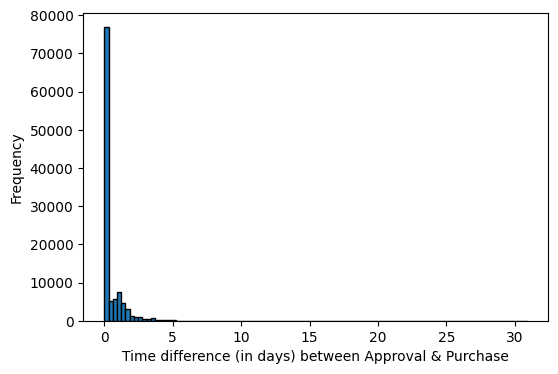

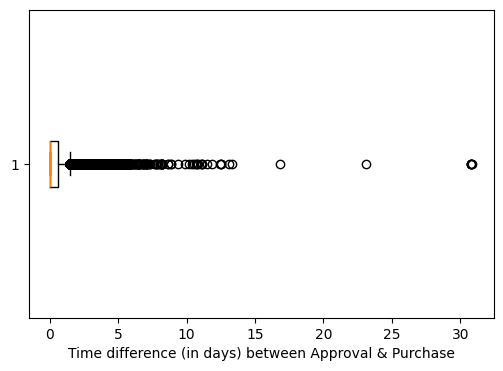

In [88]:
with_approved_df["diff_days"] = with_approved_df["difference"].dt.total_seconds() / 86400
plt.figure(figsize = (6, 4))
plt.hist(with_approved_df["diff_days"], bins=100, edgecolor='k')
plt.xlabel("Time difference (in days) between Approval & Purchase")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(6, 4))
plt.boxplot(with_approved_df["diff_days"], vert=False)
plt.xlabel("Time difference (in days) between Approval & Purchase")
plt.show()

In [89]:
# Based on the first plot, might be a good idea to impute with median (50% from .describe())
impute_indices_approved = df.loc[(df["order_status"] == "delivered") & (df["order_approved_at"].isna())].index
print(len(impute_indices_approved))
df.loc[impute_indices_approved, "order_approved_at"] = df.loc[impute_indices_approved, "order_purchase_timestamp"] + median_impute_approved

15


### Imputing for missing `order_delivered_carrier_date`

In [90]:
with_carrier_df = df.loc[(df["order_status"] == "delivered") & ~(df["order_delivered_carrier_date"].isna()),
["order_approved_at", "order_delivered_carrier_date", "shipping_limit_date"]]
with_carrier_df["diff_carrier_limit"] =  with_carrier_df["order_delivered_carrier_date"] - with_carrier_df["shipping_limit_date"]
with_carrier_df["diff_carrier_approved"] = with_carrier_df["order_delivered_carrier_date"] - with_carrier_df["order_approved_at"]
with_carrier_df

,order_approved_at,order_delivered_carrier_date,shipping_limit_date,diff_carrier_limit,diff_carrier_approved
0,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-19 09:45:35,0 days 08:48:41,6 days 08:48:41
1,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-03 11:05:13,1 days 03:29:47,8 days 03:29:47
2,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-18 14:48:30,-3 days +21:48:18,1 days 21:48:18
3,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-15 10:10:18,-5 days +03:17:42,2 days 03:17:42
4,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-02-13 13:57:51,2 days 19:48:18,11 days 19:35:56
...,...,...,...,...,...
111044,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-02 04:11:01,-7 days +07:57:59,0 days 07:57:59
111045,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-20 04:31:48,-3 days +03:33:12,0 days 03:33:12
111046,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-30 17:14:25,-5 days +21:58:49,1 days 21:58:49
111047,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-21 00:04:32,-6 days +18:58:21,0 days 18:58:21


In [91]:
with_carrier_df["diff_carrier_limit"].describe()

count                         108603
mean     -4 days +16:32:12.983287755
std        5 days 20:05:10.695674008
min             -1047 days +03:28:20
25%         -6 days +19:09:59.500000
50%                -4 days +18:52:52
75%                -2 days +11:41:34
max                116 days 18:18:06
Name: diff_carrier_limit, dtype: object

In [92]:
with_carrier_df["diff_carrier_limit"].value_counts()

diff_carrier_limit
0 days 00:00:00      136
-5 days +05:37:13     21
-2 days +21:20:30     21
0 days 21:27:13       20
-2 days +06:11:30     15
                    ... 
-1 days +21:34:13      1
-1 days +17:28:57      1
-5 days +05:42:07      1
-2 days +03:12:50      1
-2 days +17:37:40      1
Name: count, Length: 89138, dtype: int64

In [93]:
with_carrier_df["diff_carrier_approved"].describe()

count                       108603
mean     2 days 21:32:48.614780438
std      3 days 12:42:41.296399915
min                0 days 00:00:15
25%                0 days 21:46:59
50%                1 days 20:48:34
75%         3 days 16:05:45.500000
max              125 days 18:18:06
Name: diff_carrier_approved, dtype: object

In [94]:
with_carrier_df["diff_carrier_approved"].value_counts()

diff_carrier_approved
4 days 00:00:01     57
4 days 00:00:00     25
2 days 21:20:30     21
1 days 05:37:13     21
5 days 20:57:34     20
                    ..
1 days 23:50:49      1
13 days 22:50:05     1
4 days 12:19:49      1
0 days 19:46:34      1
3 days 10:55:28      1
Name: count, Length: 85204, dtype: int64

In [95]:
median_impute_carrier_limit_diff = with_carrier_df["diff_carrier_limit"].describe()["50%"]

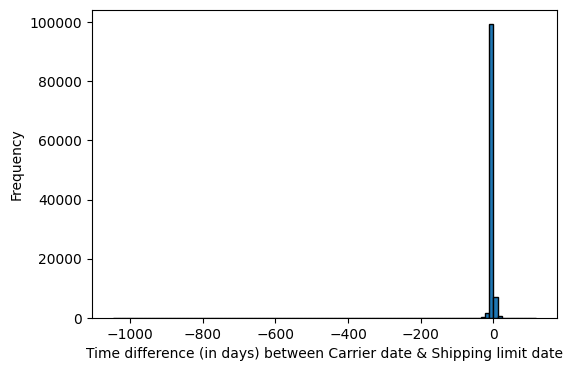

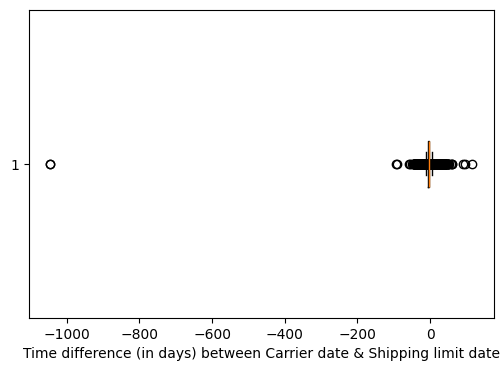

In [96]:
with_carrier_df["diff_carrier_limit"] = with_carrier_df["diff_carrier_limit"].dt.total_seconds() / 86400
plt.figure(figsize = (6, 4))
plt.hist(with_carrier_df["diff_carrier_limit"], bins=100, edgecolor='k')
plt.xlabel("Time difference (in days) between Carrier date & Shipping limit date")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(6, 4))
plt.boxplot(with_carrier_df["diff_carrier_limit"], vert=False)
plt.xlabel("Time difference (in days) between Carrier date & Shipping limit date")
plt.show()

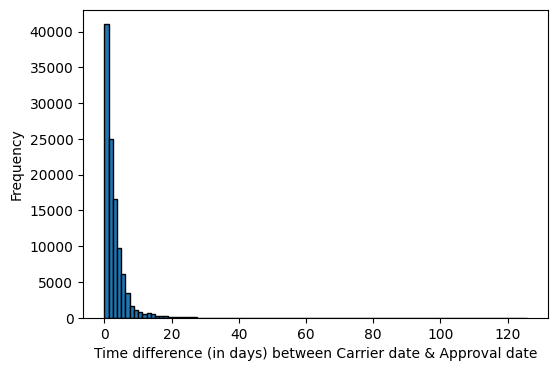

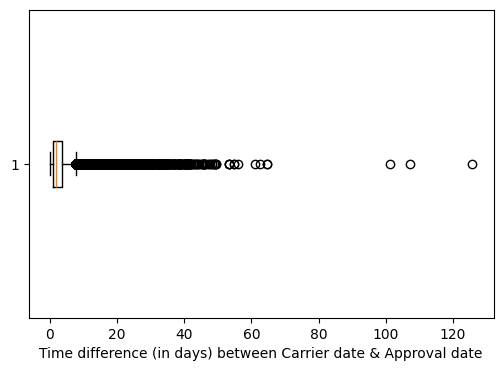

In [97]:
with_carrier_df["diff_carrier_approved"] = with_carrier_df["diff_carrier_approved"].dt.total_seconds() / 86400
plt.figure(figsize = (6, 4))
plt.hist(with_carrier_df["diff_carrier_approved"], bins=100, edgecolor='k')
plt.xlabel("Time difference (in days) between Carrier date & Approval date")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(6, 4))
plt.boxplot(with_carrier_df["diff_carrier_approved"], vert=False)
plt.xlabel("Time difference (in days) between Carrier date & Approval date")
plt.show()

In [98]:
impute_carrier_indices = df.loc[(df["order_status"] == "delivered") & (df["order_delivered_carrier_date"].isna())].index
print(len(impute_carrier_indices))
df.loc[impute_carrier_indices, "order_delivered_carrier_date"] = df.loc[impute_carrier_indices, "shipping_limit_date"] + median_impute_carrier_limit_diff

2


In [99]:
df.loc[impute_carrier_indices]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
18290,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,2017-10-15 05:00:08,2017-11-20 19:44:47,2017-11-14,a2ac81ecc3704410ae240e74d4f0af40,13334,indaiatuba,SP,1,44c2baf621113fa7ac95fa06b4afbc68,3f2af2670e104d1bcb54022274daeac5,2017-10-18 10:07:16,179.0,14.98
19559,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-06-01 18:23:08,NaT,2017-06-23,d77cf4be2654aa70ef150f8bfec076a6,91330,porto alegre,RS,1,30b5b5635a79548a48d04162d971848f,f9bbdd976532d50b7816d285a22bd01e,2017-06-04 23:30:16,179.0,15.00


### Imputing for missing `order_delivered_customer_date`

In [100]:
with_delivered_df = df.loc[(df["order_status"] == "delivered") & ~(df["order_delivered_customer_date"].isna()), ["order_delivered_carrier_date","order_delivered_customer_date", "order_estimated_delivery_date"]]
with_delivered_df["diff_delivered_estimated"] = with_delivered_df["order_delivered_customer_date"] - with_delivered_df["order_estimated_delivery_date"]
with_delivered_df["diff_delivered_carrier"] = with_delivered_df["order_delivered_customer_date"] - with_delivered_df["order_delivered_carrier_date"]
with_delivered_df

,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,diff_delivered_estimated,diff_delivered_carrier
0,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,-9 days +23:43:48,1 days 05:09:32
1,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,-3 days +16:04:24,8 days 01:29:24
2,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,-14 days +13:19:16,6 days 00:42:28
3,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,-6 days +13:32:39,4 days 00:04:39
4,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,-16 days +16:42:31,13 days 06:56:22
...,...,...,...,...,...
111044,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,-8 days +22:56:40,15 days 10:47:40
111045,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,-9 days +20:31:55,6 days 12:26:55
111046,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,-13 days +12:22:22,1 days 21:09:08
111047,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,-9 days +21:59:40,1 days 02:56:47


In [101]:
with_delivered_df["diff_delivered_estimated"].describe()

count                          108597
mean     -12 days +17:20:50.793649917
std        10 days 04:11:29.518743958
min               -147 days +23:36:47
25%                -17 days +16:54:44
50%                -13 days +23:51:30
75%                 -7 days +13:36:30
max                 188 days 23:24:07
Name: diff_delivered_estimated, dtype: object

In [102]:
median_impute_delivered_estimated_difference = with_delivered_df["diff_delivered_estimated"].describe()["50%"]

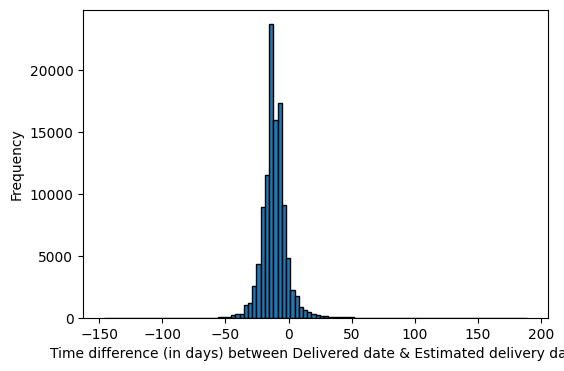

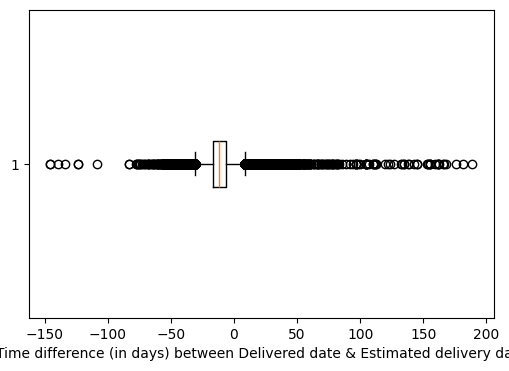

In [103]:
with_delivered_df["diff_delivered_estimated"] = with_delivered_df["diff_delivered_estimated"].dt.total_seconds() / 86400
plt.figure(figsize = (6, 4))
plt.hist(with_delivered_df["diff_delivered_estimated"], bins=100, edgecolor='k')
plt.xlabel("Time difference (in days) between Delivered date & Estimated delivery date")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(6, 4))
plt.boxplot(with_delivered_df["diff_delivered_estimated"], vert=False)
plt.xlabel("Time difference (in days) between Delivered date & Estimated delivery date")
plt.show()

In [104]:
with_delivered_df["diff_delivered_carrier"].describe()

count                       108597
mean     9 days 05:23:27.736530475
std      8 days 15:14:54.709090466
min                0 days 00:00:00
25%                4 days 01:39:45
50%                7 days 01:38:42
75%               11 days 22:43:50
max              205 days 04:35:00
Name: diff_delivered_carrier, dtype: object

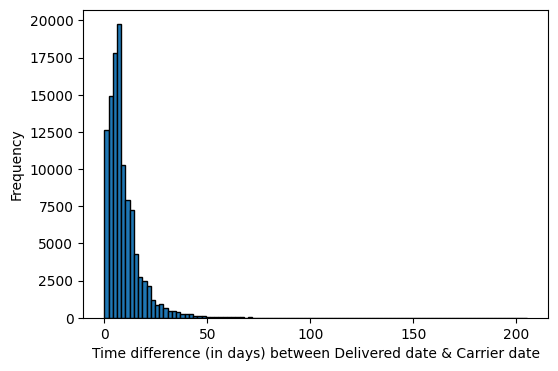

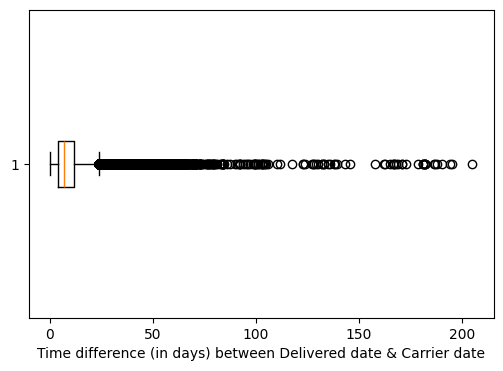

In [105]:
with_delivered_df["diff_delivered_carrier"] = with_delivered_df["diff_delivered_carrier"].dt.total_seconds() / 86400
plt.figure(figsize = (6, 4))
plt.hist(with_delivered_df["diff_delivered_carrier"], bins=100, edgecolor='k')
plt.xlabel("Time difference (in days) between Delivered date & Carrier date")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(6, 4))
plt.boxplot(with_delivered_df["diff_delivered_carrier"], vert=False)
plt.xlabel("Time difference (in days) between Delivered date & Carrier date")
plt.show()

In [106]:
# What do I impute with in this case? diff_delivered_estimated is nearly a skewed Gaussian with mean ~ median, so that is a good choice;
# only 8 records have missing order_delivered_customer_date, so a simple median imputation should suffice
impute_delivered_indices = df.loc[(df["order_status"] == "delivered") & (df["order_delivered_customer_date"].isna())].index
df.loc[impute_delivered_indices, "order_delivered_customer_date"] = df.loc[impute_delivered_indices, "order_estimated_delivery_date"] + median_impute_delivered_estimated_difference

In [107]:
df.to_parquet(r"../data/merged_info_after_impute.parquet", index = False, engine='pyarrow', compression='snappy')

## Wrangling

In [108]:
df = pd.read_parquet(r"../data/merged_info_after_impute.parquet")

In [109]:
df["price_with_freight_charges"] = df["price"] + df["freight_value"]

In [110]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,price_with_freight_charges
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


In [111]:
df["customer_unique_id"].nunique()

94101

In [112]:
# Calculate customer lifetime value (total spent per customer)
customer_lifetime_value_df = df.groupby("customer_unique_id").agg(lifetime_value = ("price_with_freight_charges", "sum")).reset_index()
customer_lifetime_value_df 

,customer_unique_id,lifetime_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
94096,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42
94097,fffea47cd6d3cc0a88bd621562a9d061,84.58
94098,ffff371b4d645b6ecea244b27531430a,112.46
94099,ffff5962728ec6157033ef9805bacc48,133.69


In [113]:
state_df = df.groupby("customer_state", observed=False)["customer_id"].count().reset_index()
state_df

,customer_state,customer_id
0,AC,89
1,AL,440
2,AM,164
3,AP,82
4,BA,3750
5,CE,1455
6,DF,2363
7,ES,2228
8,GO,2293
9,MA,812


In [114]:
# Customer Analytics by geography
city_with_state_df = (df.groupby(["customer_state", "customer_city"], observed = False)
.agg(customers_count = ("customer_id", "count")).loc[lambda x: x["customers_count"] > 0].reset_index())
city_with_state_df

,customer_state,customer_city,customers_count
0,AC,brasileia,3
1,AC,cruzeiro do sul,3
2,AC,epitaciolandia,1
3,AC,manoel urbano,1
4,AC,porto acre,1
...,...,...,...
4276,TO,silvanopolis,1
4277,TO,sitio novo do tocantins,4
4278,TO,taguatinga,3
4279,TO,tocantinopolis,8


In [115]:
# Average order value analysis
order_total_df = df.groupby("order_id").agg(total_by_order = ("price_with_freight_charges", "sum")).reset_index()
print("Average order total: ", order_total_df.iloc[:, 1].mean(), "\nMedian order total: ", np.median(order_total_df.iloc[:, 1]))
order_total_df

Average order total:  160.75202726039225 
Median order total:  105.29


,order_id,total_by_order
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
97279,fffc94f6ce00a00581880bf54a75a037,343.40
97280,fffcd46ef2263f404302a634eb57f7eb,386.53
97281,fffce4705a9662cd70adb13d4a31832d,116.85
97282,fffe18544ffabc95dfada21779c9644f,64.71


In [116]:
# Time series analysis of sales patterns
dates_df = df.loc[:, ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
"order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date"]]
dates_df

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date
0,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,2017-09-19 09:45:35
1,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,2017-05-03 11:05:13
2,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,2018-01-18 14:48:30
3,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,2018-08-15 10:10:18
4,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,2017-02-13 13:57:51
...,...,...,...,...,...,...
111044,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18,2018-05-02 04:11:01
111045,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01,2018-07-20 04:31:48
111046,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10,2017-10-30 17:14:25
111047,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25,2017-08-21 00:04:32


#### What can we do with the above data? Some comparisons could be the time difference between
*  delivered carrier date & delivered customer date
*  estimated delivery date & delivered customer date
*  shipping limit date & delivered carrier date
* order purchase date & delivered customer date